dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99])


<BarContainer object of 92 artists>

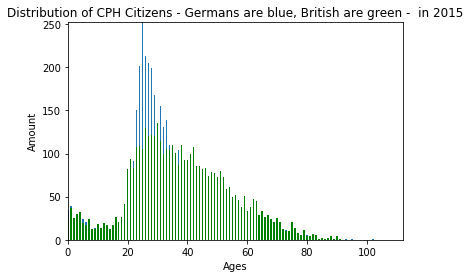

In [73]:
%matplotlib notebook
import kkdata
import matplotlib.pyplot as plt

def gps(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    print(neighbourhoods)
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_germans_per_age = {}
    no_british_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                
                if 5180 in c_codes:
                    no_germans_per_age.setdefault(age, 0)
                    no_germans_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][5180]
                    

                if 5170 in c_codes:
                    no_british_per_age.setdefault(age, 0)
                    no_british_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][5170]
                    
                    
    return no_germans_per_age, no_british_per_age

no_germans_per_age, no_british_per_age = gps() #returned tuple is deconstructed into 2 variables


agesG = list(no_germans_per_age.keys())
no_citicensG = list(no_germans_per_age.values()) 
agesB = list(no_british_per_age.keys())
no_citicensB = list(no_british_per_age.values())

 

plt.bar(agesG, no_citicensG, width=0.5, linewidth=0, align='center')
plt.ticklabel_format(useOffset=False)
plt.axis([0, max(agesG) + 10, 0, max(no_citicensG)])
title = 'Distribution of CPH Citizens - Germans are blue, British are green -  in {}'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.bar(agesB, no_citicensB, width=0.5, linewidth=0, align='center', color='green')

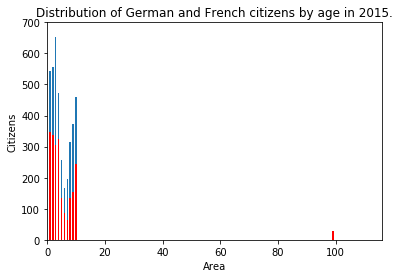

In [91]:
%matplotlib notebook
import matplotlib.pyplot as plt
import kkdata


#Pretty much the same functionality as above, except this time the data we look at is based on the neighbourhood and nationality(?) code
def get_area_distribution(year_of_interest = 2015, code=5100):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    data = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    if(code == f_code):
                        data.setdefault(n, 0)
                        data[n] += kkdata.STATISTICS[year_of_interest][n][age][code]
    
    return data;
german_area = get_area_distribution(code = 5180)
french_area = get_area_distribution(code = 5130)


#Statkoder:
#
# Danmark: 5100
# Frankrig: 5130
# Storbritannien: 5170
# Tyskland: 5180
#############

#plt.cla()
#German
plt.bar(list(german_area.keys()), list(german_area.values()), width=0.5, align='center') # bar(x-vals, y-vals, bar width, align bar relative to x-val on x-axis) )
#British
plt.bar(list(french_area.keys()), list(french_area.values()), width=0.5, align='center', color='red')

#plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, 700]) #axis(x-min, x-max, y-min, y-max)
title = 'Distribution of German and French citizens by age in {}.'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Area", fontsize=10)
plt.ylabel("Citizens", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

<IPython.core.display.Javascript object>


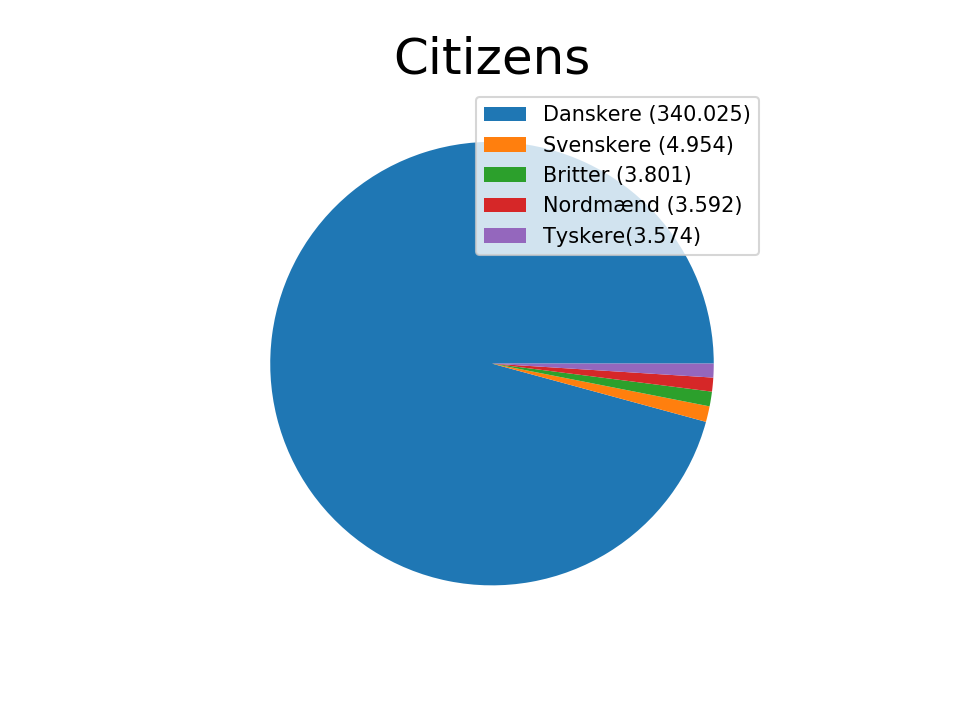

{5100: 340025, 5120: 4054, 5170: 3801, 5110: 3592, 5180: 3574}


In [93]:
import kkdata
%matplotlib notebook
import matplotlib.pyplot as plt

year=2015
def citizen():
    citizenship_dist={}
    citizenship={}
    for area in kkdata.STATISTICS[year].keys():
        for age in kkdata.STATISTICS[year][area]:
            if(age>19 and age<66):
                  for citizen_code in kkdata.STATISTICS[year][area][age]:
                    citizenship_dist[citizen_code] = citizenship_dist.get(citizen_code, 0)+kkdata.STATISTICS[year][area][age][citizen_code]
    return citizenship_dist

def get_top_5(data):
    so = sorted(data.items(), key=lambda x: x[1], reverse=True)
    so10 = so[:5]
    return {tup[0]:tup[1] for tup in so10}

plt.figure()
y = get_top_5(citizen()).values()
plt.pie(y)
plt.title("Citizens", fontsize=24)
labels = [r'Danskere (340.025)',r'Svenskere (4.954)', r'Britter (3.801)', r'Nordmænd (3.592)', r'Tyskere(3.574)']
plt.legend(labels, loc="best")
print(get_top_5(citizen()))
